In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
import joblib
import cufflinks
from plotly.offline import iplot
import plotly.figure_factory as ff

## Data Collection and Analysis

In [2]:
df = pd.read_csv('bodyfat.csv')
df

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  
1     58.7  37.3   23.4    30.5     28.9   18.2  
2     59.6  38.9   24.0    28.8     25.2   16.6  
3     60.1  37.3   22.8    32.4     29.4   18.2  
4     63.2  42.2   24.0    32.2     27.7   17.7  
..     ...   ...    ...     ...      ...    ...  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9  

[252 rows x 15 columns]

In [3]:
df.describe().loc[['min', 'max']]

Density  BodyFat   Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
min   0.9950      0.0  22.0  118.50   29.50  31.1   79.3     69.4   85.0   
max   1.1089     47.5  81.0  363.15   77.75  51.2  136.2    148.1  147.7   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
min   47.2  33.0   19.1    24.8     21.0   15.8  
max   87.3  49.1   33.9    45.0     34.9   21.4

In [4]:
df.shape

(252, 15)

In [5]:
df.describe()

Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.783077    7.164058    5.249952    2.411805    1.694893   
min     79.300000   69.400000   85.000000   47.200000   33.000000   19.100000   
25%     94.350000   84.575000   95.500000   56.000000   36.975000   22.000000   
50%     99.650000   90.950000   99.300000   59.000000   38.500000   22.800000   
75%    105.375000   99.325000  103.525000   62.350000   39.925000   24.000000   
max    136.200000  148.100000  147.700000   87.300000   49.100000   33.900000   

           Biceps     Forearm       Wrist  
count  252.000000  252.000000  252.000000  
mean    32.273413   28.663889   18.229762  
std      3.021274    2.020691    0.933585  
min     24.800000   21.000000   15.800000  
25%     30.200000   27.300000   17.600000  
50%     32.050000   28.700000   18.300000  
75%     34.325000   30.000000   18.800000  
max     45.000000   34.900000   21.400000

In [6]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature= [feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 15
Discrete feature Count 0
Continuous feature Count 15
Categorical feature Count 0


In [7]:
df.isnull().sum()*100/len(df)

Density    0.0
BodyFat    0.0
Age        0.0
Weight     0.0
Height     0.0
Neck       0.0
Chest      0.0
Abdomen    0.0
Hip        0.0
Thigh      0.0
Knee       0.0
Ankle      0.0
Biceps     0.0
Forearm    0.0
Wrist      0.0
dtype: float64

In [8]:
print(numerical_feature)


['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']


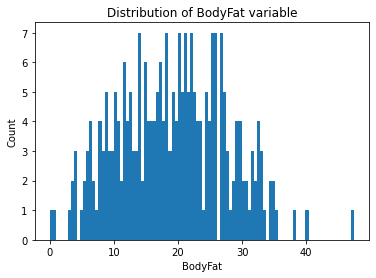

In [9]:
plt.hist(df['BodyFat'], bins=100)
plt.ylabel('Count')
plt.xlabel('BodyFat')
plt.title('Distribution of BodyFat variable');

In [10]:
df.loc[df['BodyFat'] < 4, 'BodyFat']

25     3.7
28     3.7
54     3.9
170    3.0
171    0.7
181    0.0
Name: BodyFat, dtype: float64

In [11]:
df = df.drop(df[df['BodyFat'] < 1].index)
df.describe()

Density    BodyFat         Age      Weight      Height        Neck  \
count  250.000000  250.00000  250.000000  250.000000  250.000000  250.000000   
mean     1.055190   19.30120   44.944000  179.378800   70.176000   38.024800   
std      0.018607    8.23016   12.633101   29.059153    3.663086    2.412706   
min      0.995000    3.00000   22.000000  125.000000   29.500000   31.100000   
25%      1.041400   12.60000   36.000000  159.375000   68.312500   36.400000   
50%      1.054800   19.25000   43.500000  176.750000   70.125000   38.000000   
75%      1.070050   25.30000   54.000000  197.000000   72.250000   39.475000   
max      1.099100   47.50000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   100.950400   92.718800  100.007200   59.492400   38.626000   23.118400   
std      8.328483   10.667279    7.097397    5.179018    2.387569    1.690198   
min     83.400000   70.400000   85.300000   49.300000   33.000000   19.100000   
25%     94.675000   85.225000   95.600000   56.100000   37.100000   22.000000   
50%     99.700000   91.050000   99.300000   59.050000   38.500000   22.800000   
75%    105.525000   99.575000  103.575000   62.450000   39.975000   24.000000   
max    136.200000  148.100000  147.700000   87.300000   49.100000   33.900000   

           Biceps     Forearm       Wrist  
count  250.000000  250.000000  250.000000  
mean    32.321600   28.691200   18.242000  
std      2.981741    2.004554    0.926992  
min     25.300000   21.000000   15.800000  
25%     30.300000   27.300000   17.600000  
50%     32.100000   28.750000   18.300000  
75%     34.375000   30.000000   18.800000  
max     45.000000   34.900000   21.400000

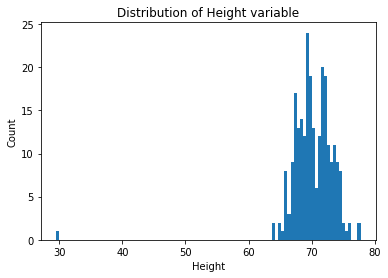

In [12]:
plt.hist(df['Height'], bins=100)
plt.ylabel('Count')
plt.xlabel('Height')
plt.title('Distribution of Height variable');

In [13]:
df = df.drop(df[df['Height'] < 30].index)

In [14]:
df = df.drop(df[df['Weight'] > 350].index)

In [15]:
df.sort_values(by=['Height']).tail(30)

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
53    1.0848      6.3   49  152.75   73.50  35.1   93.3     79.6   91.6   
154   1.0510     21.0   27  200.25   73.50  38.2  101.1    100.1  105.0   
165   1.0549     19.2   35  217.00   73.75  40.5  107.5     95.1  104.5   
72    1.0796      8.5   56  160.75   73.75  36.4   93.6     82.9   96.3   
103   1.0480     22.3   49  196.75   73.75  40.7  103.5     95.5  101.6   
30    1.0716     11.9   32  182.00   73.75  38.7  100.5     88.7   99.8   
203   1.0854      6.0   44  184.00   74.00  37.9  100.8     89.1  102.6   
137   1.0325     29.4   43  187.75   74.00  37.7   97.8     98.6  100.6   
8     1.0900      4.1   25  191.00   74.00  38.1  100.9     82.5   99.9   
118   1.0404     25.8   40  191.00   74.00  38.3   95.4     92.4  104.3   
107   1.0569     18.3   52  203.25   74.25  42.0  110.0    101.6  100.7   
227   1.0418     25.2   55  198.50   74.25  38.3  105.3     96.7  106.6   
186   1.0453     23.6   41  232.75   74.25  41.9  117.5    109.3  108.8   
184   1.0587     17.5   40  170.50   74.25  37.7   98.9     90.4   95.5   
180   1.0387     26.6   39  219.25   74.25  40.0  108.5    104.6  109.8   
120   1.0358     27.9   52  206.50   74.50  40.8  104.3     99.2  104.1   
151   1.0542     19.6   26  241.75   74.50  41.8  108.3    102.9  114.4   
211   1.0373     27.2   49  216.25   74.50  40.2  115.6    104.0  109.0   
179   1.0603     16.9   39  234.75   74.50  42.8  109.5    104.5  109.9   
10    1.0830      7.1   26  186.25   74.50  38.5  101.5     83.6   98.2   
94    1.0785      9.0   47  184.25   74.50  37.3   99.6     88.8  101.4   
5     1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4  107.8   
193   1.0429     24.7   42  224.75   74.75  38.5  106.7    105.7  111.8   
139   1.0522     20.4   49  212.75   75.00  40.8  104.7    106.6  107.7   
155   1.0594     17.3   28  171.50   75.25  35.6   92.1     83.5   98.3   
108   1.0593     17.3   43  194.00   75.50  38.5  110.1     88.7  102.1   
11    1.0812      7.8   27  216.00   76.00  39.4  103.6     90.9  107.7   
191   1.0140     38.1   42  244.25   76.00  41.8  115.2    113.7  112.4   
144   1.0754     10.3   23  188.15   77.50  38.0   96.6     85.3  102.5   
95    1.0991     17.4   53  224.50   77.75  41.1  113.2     99.2  107.5   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
53    52.6  37.6   22.6    38.5     27.4   18.5  
154   62.1  40.0   24.9    33.7     29.2   19.4  
165   64.8  41.3   25.6    36.4     33.7   19.4  
72    52.9  37.5   23.1    29.7     27.3   18.2  
103   59.1  39.8   25.4    31.0     30.3   19.7  
30    57.5  38.7   33.9    32.5     27.7   18.4  
203   60.6  39.0   24.0    32.9     29.2   18.4  
137   63.6  39.2   23.8    34.3     28.4   17.7  
8     62.9  38.3   23.8    35.9     31.1   18.2  
118   64.6  41.1   24.8    33.6     29.5   18.5  
107   55.8  38.7   23.4    35.1     29.6   19.1  
227   64.0  42.6   23.4    33.2     30.0   18.4  
186   67.7  41.3   24.7    37.2     31.8   20.0  
184   55.4  38.9   22.4    30.5     28.9   17.7  
180   68.1  42.8   24.1    35.6     29.0   19.0  
120   58.5  39.3   24.6    33.9     31.2   19.5  
151   72.9  43.5   25.1    38.5     33.8   19.6  
211   63.7  40.3   23.2    36.8     31.0   18.9  
179   69.5  43.1   25.8    39.1     32.5   19.9  
10    59.7  39.7   25.2    32.8     29.4   18.5  
94    57.4  39.6   24.6    30.3     27.9   17.8  
5     66.0  42.0   25.6    35.7     30.6   18.8  
193   65.3  43.3   26.0    33.7     29.9   18.5  
139   66.5  42.5   24.5    35.5     29.8   18.7  
155   57.3  37.8   21.7    32.2     27.7   17.7  
108   57.5  40.0   24.8    35.1     30.7   19.2  
11    66.2  39.2   25.9    37.2     30.2   19.0  
191   68.5  45.0   25.5    37.1     31.2   19.9  
144   59.1  37.6   23.2    31.8     29.7   18.3  
95    61.7  42.3   23.2    32.9     30.8   20.4

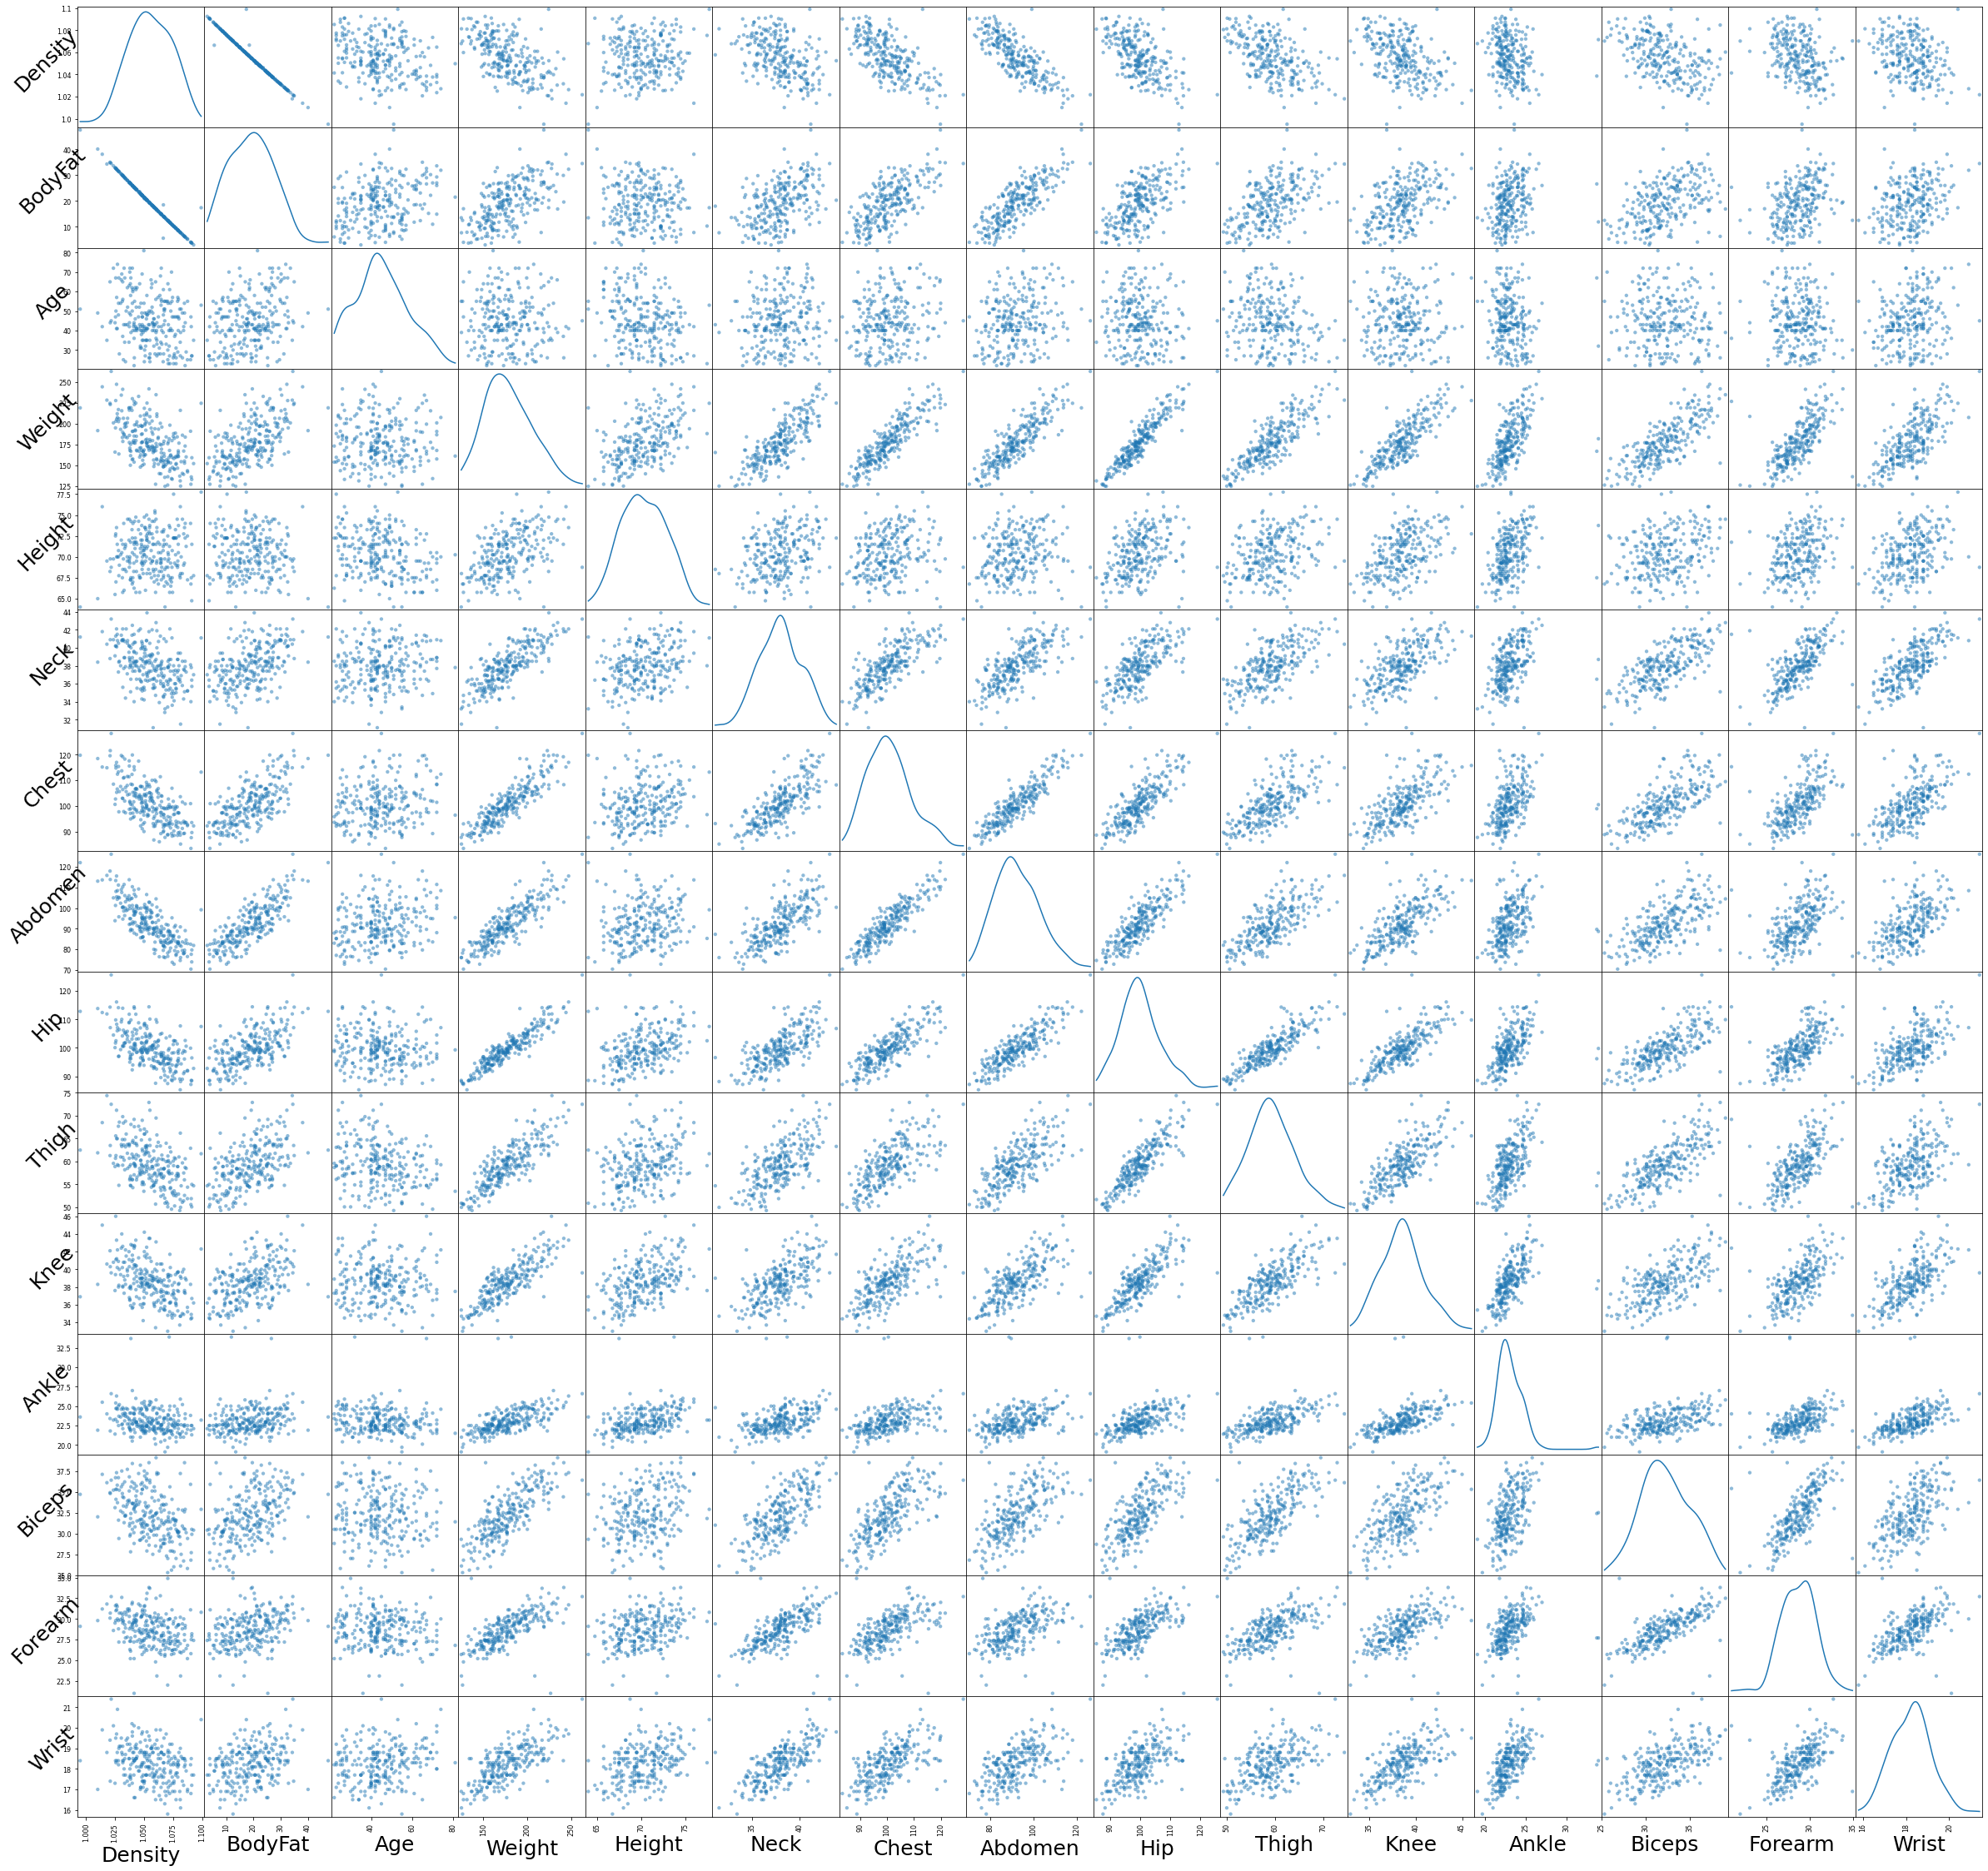

In [16]:
axes = pd.plotting.scatter_matrix(df, figsize=(41, 40), s=75, diagonal='kde')
for ax in axes.flatten():
    ax.set_ylabel(ax.get_ylabel(), fontsize=25, rotation=45)
    ax.set_xlabel(ax.get_xlabel(), fontsize=25)

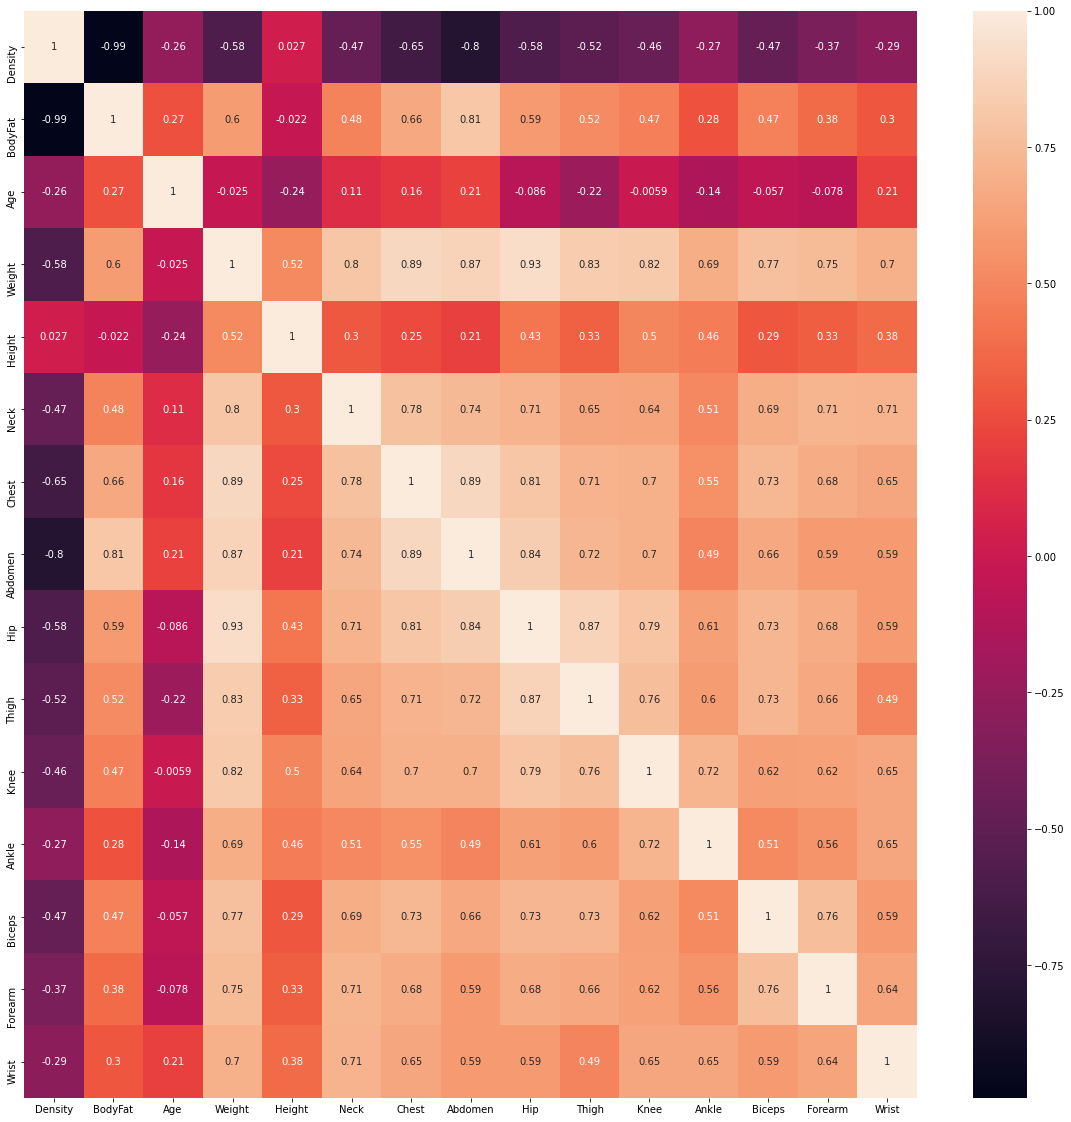

In [17]:
corr = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corr,annot=True)

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



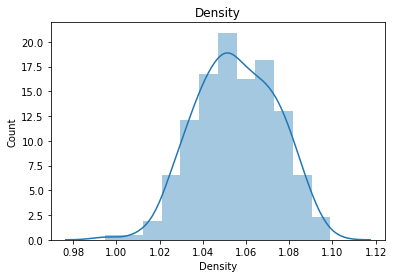

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



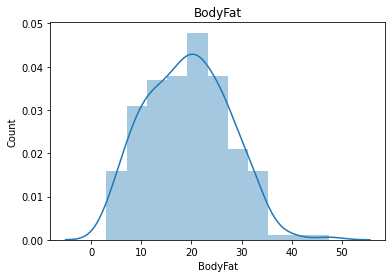

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



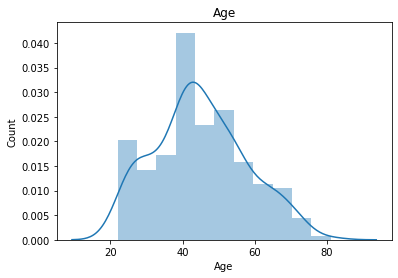

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



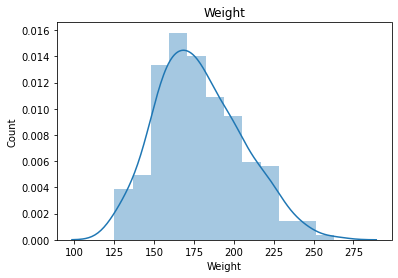

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



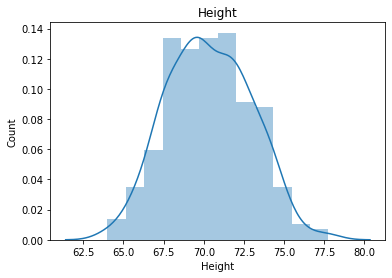

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



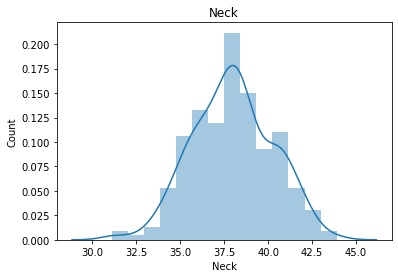

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



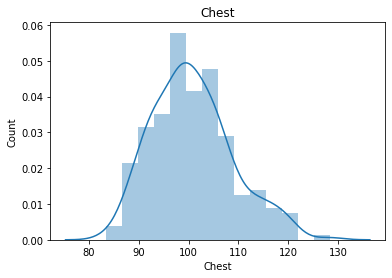

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



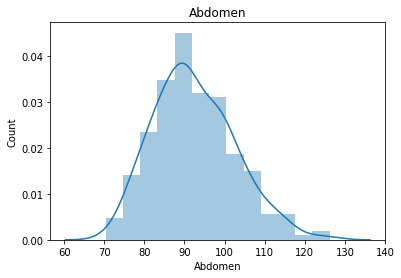

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



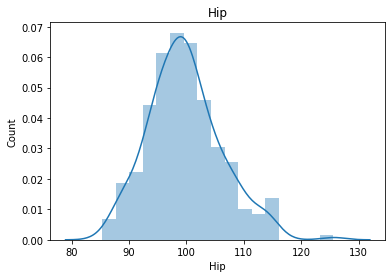

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



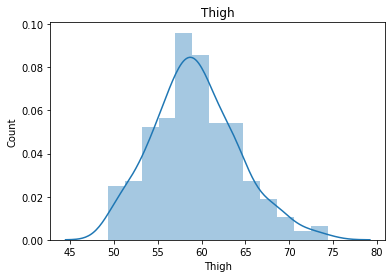

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



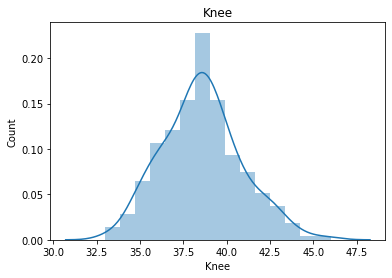

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



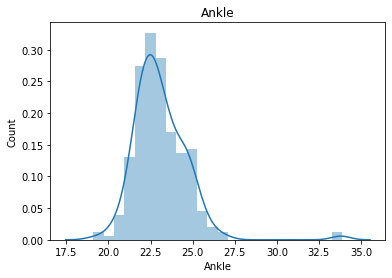

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



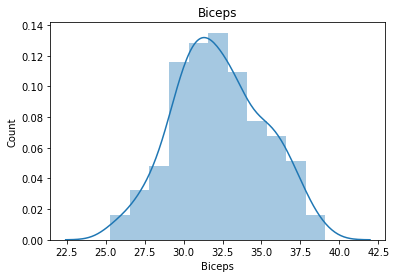

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



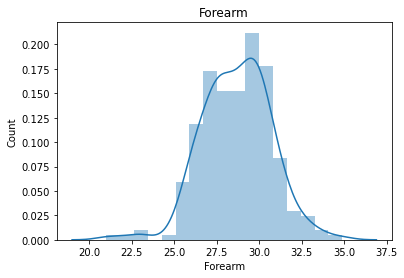

<Figure size 1080x1080 with 0 Axes>

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



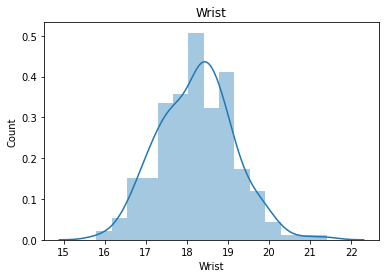

<Figure size 1080x1080 with 0 Axes>

In [18]:
for feature in numerical_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

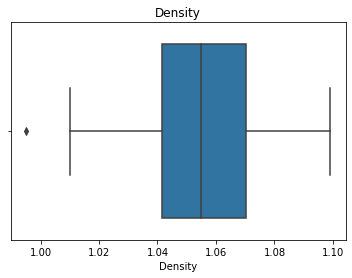

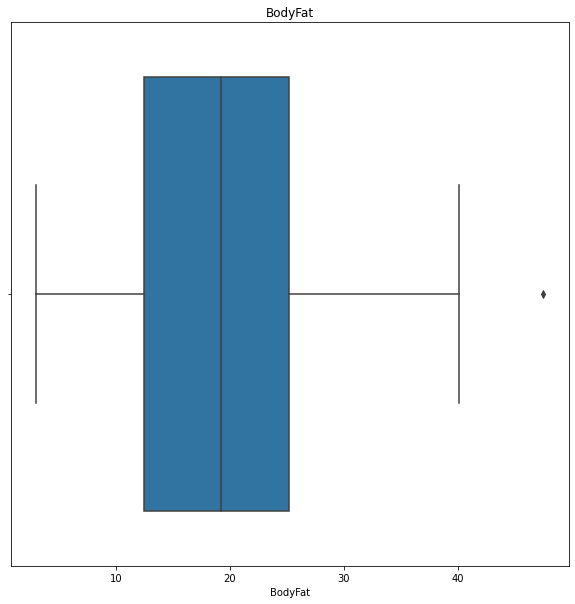

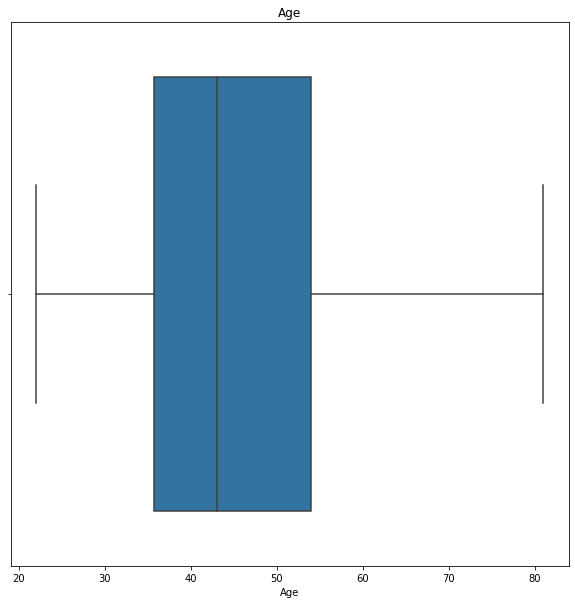

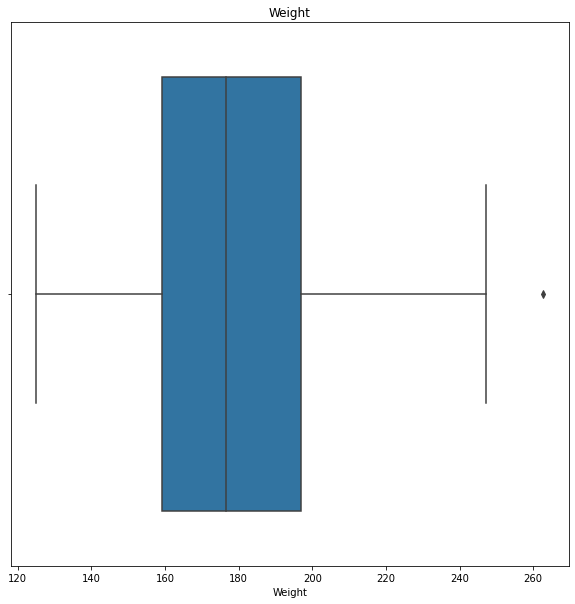

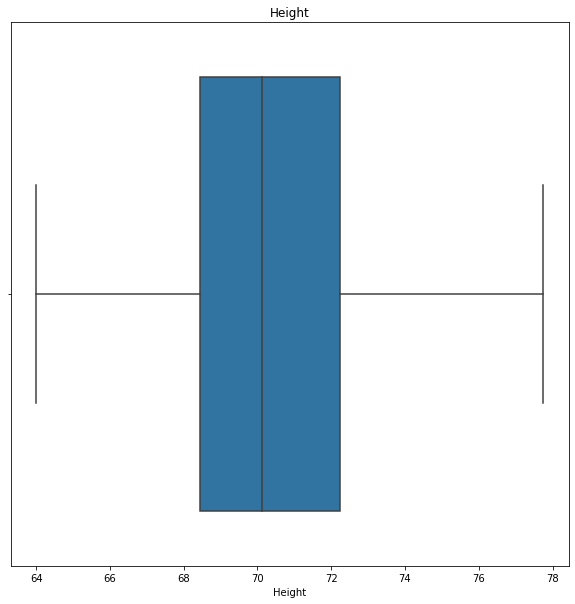

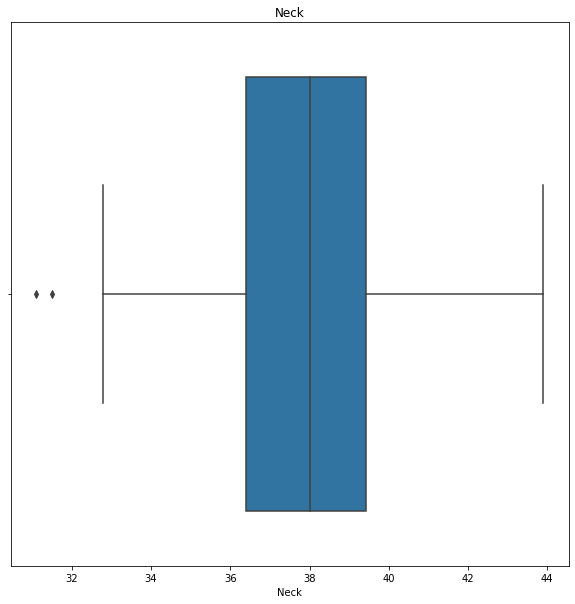

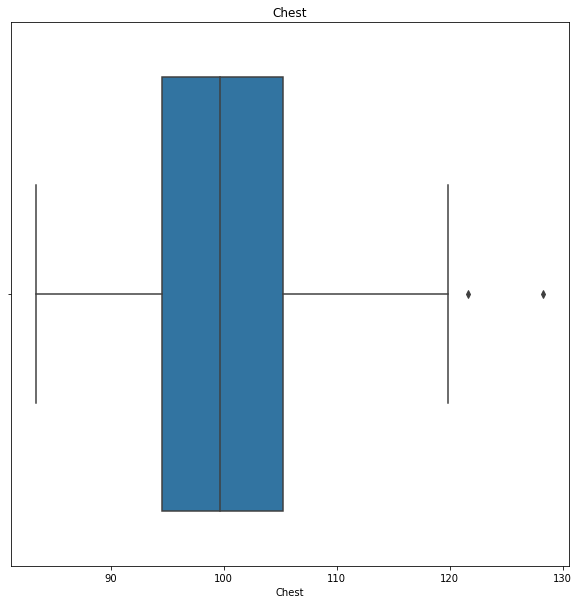

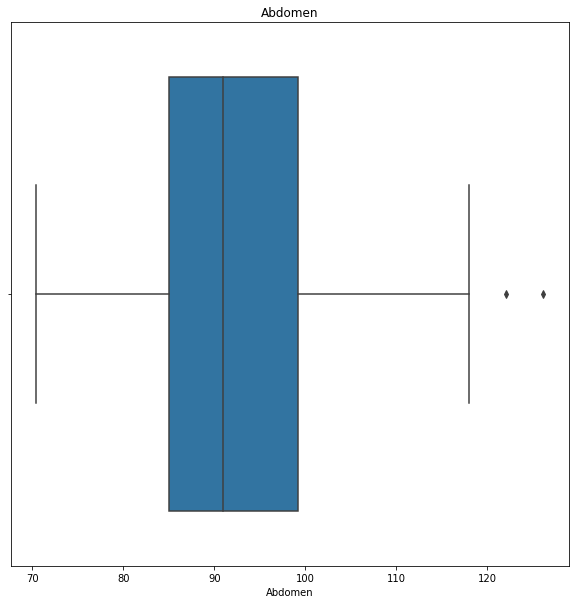

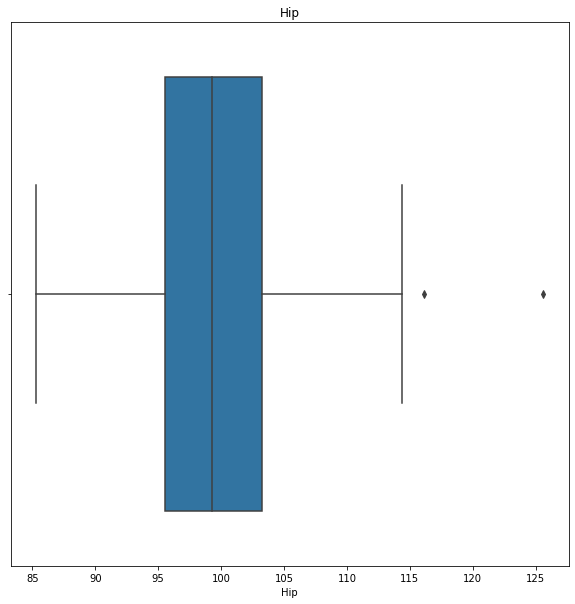

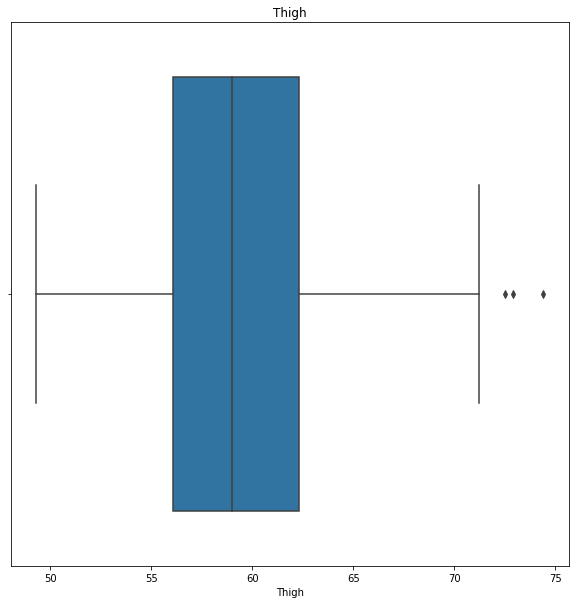

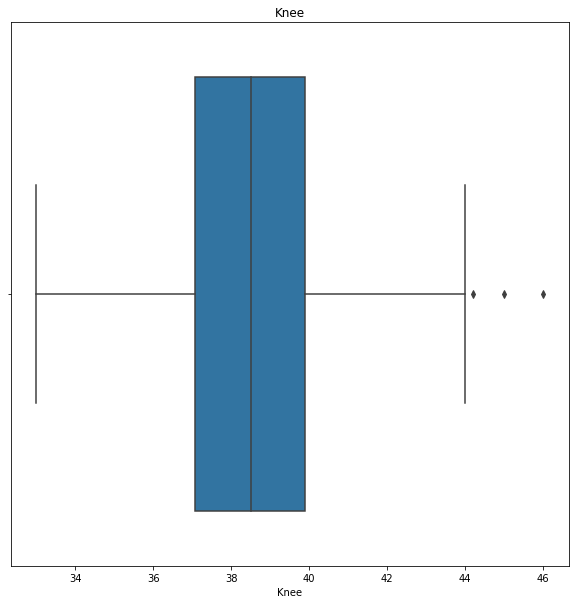

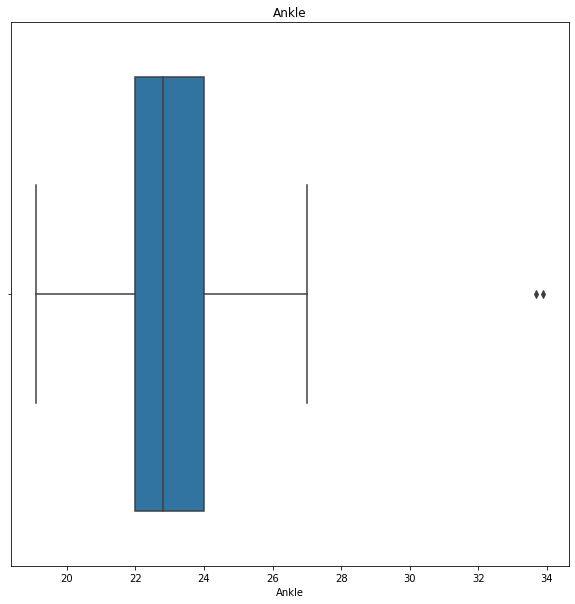

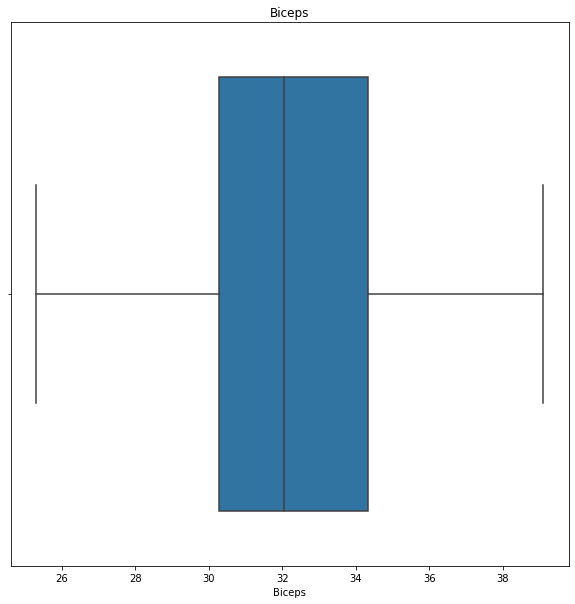

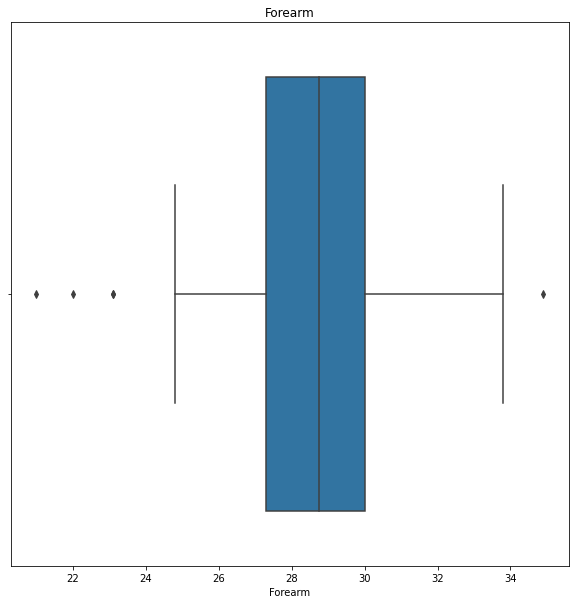

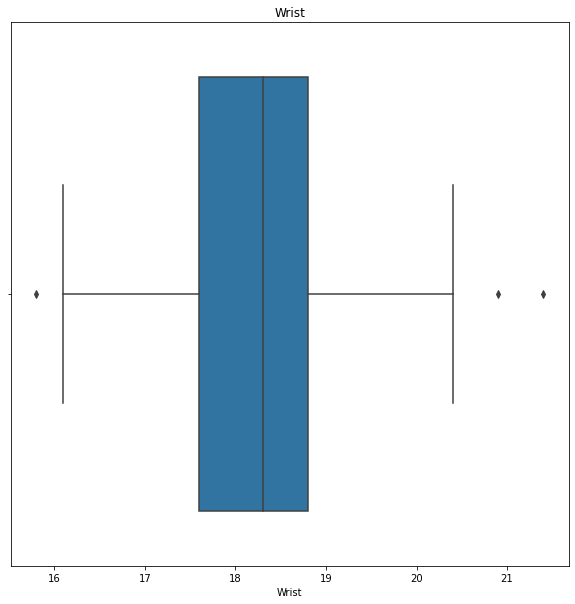

<Figure size 720x720 with 0 Axes>

In [19]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(10,10))

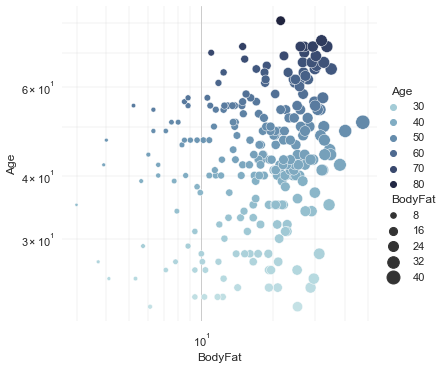

In [20]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset
#planets = sns.load_dataset(df)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="BodyFat", y="Age",
    hue="Age", size="BodyFat",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [21]:
for feature in continuous_feature:
    print(feature)

Density
BodyFat
Age
Weight
Height
Neck
Chest
Abdomen
Hip
Thigh
Knee
Ankle
Biceps
Forearm
Wrist


In [22]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

Density


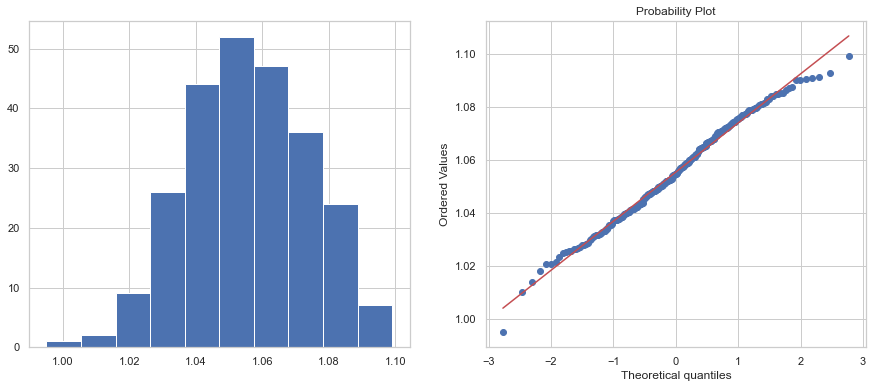

BodyFat


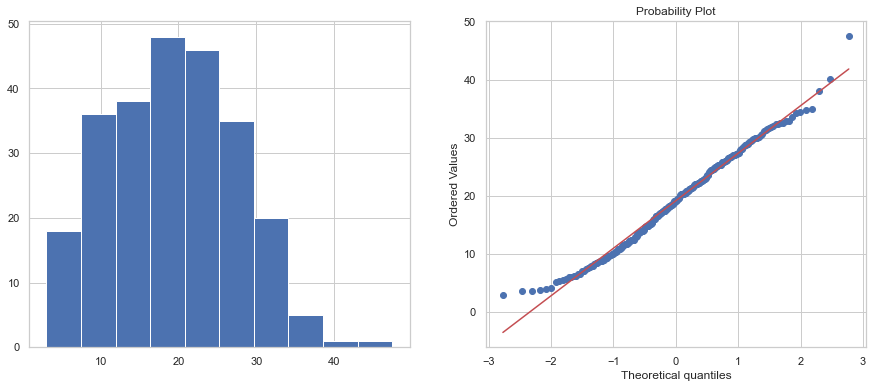

Age


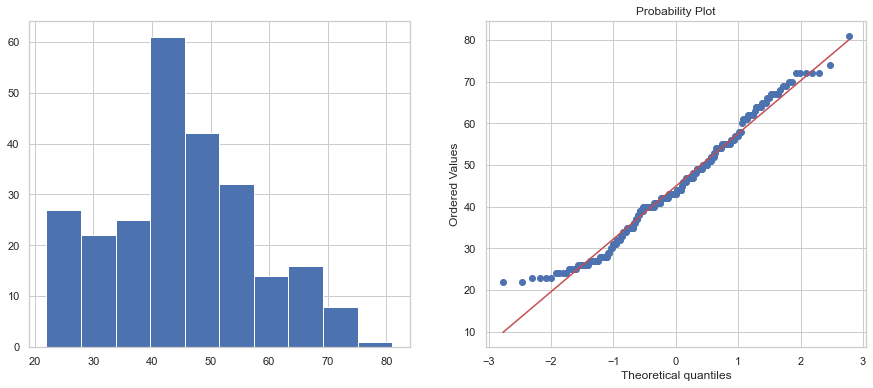

Weight


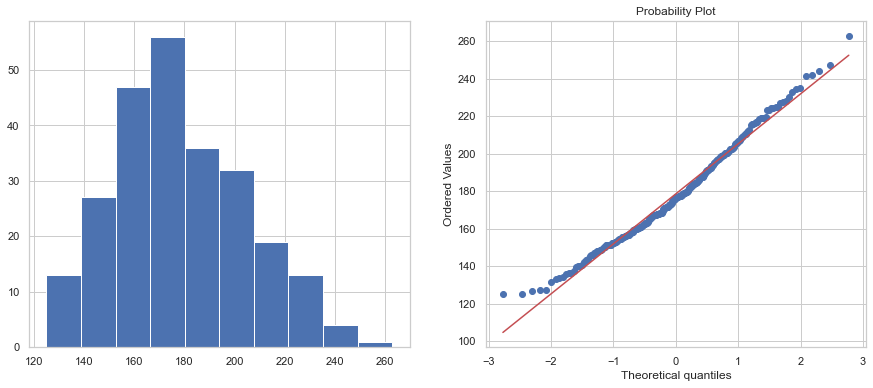

Height


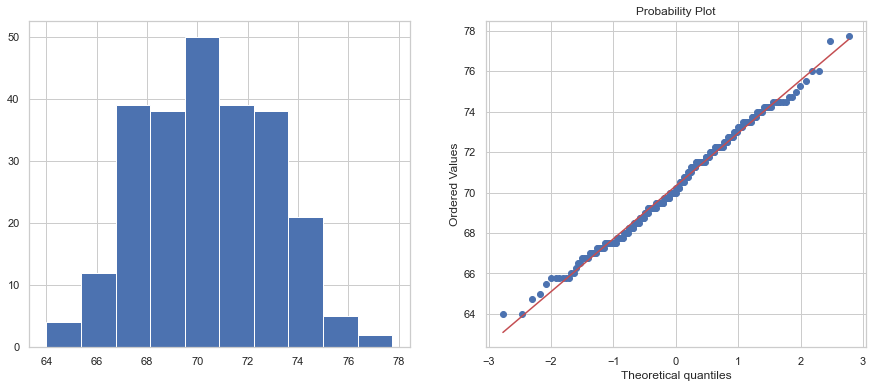

Neck


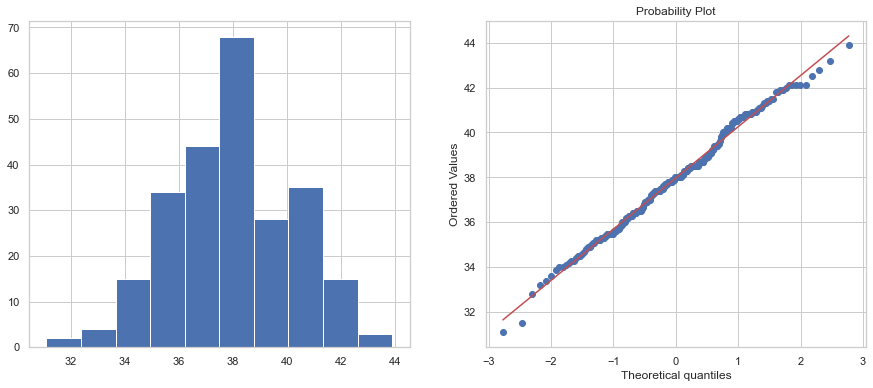

Chest


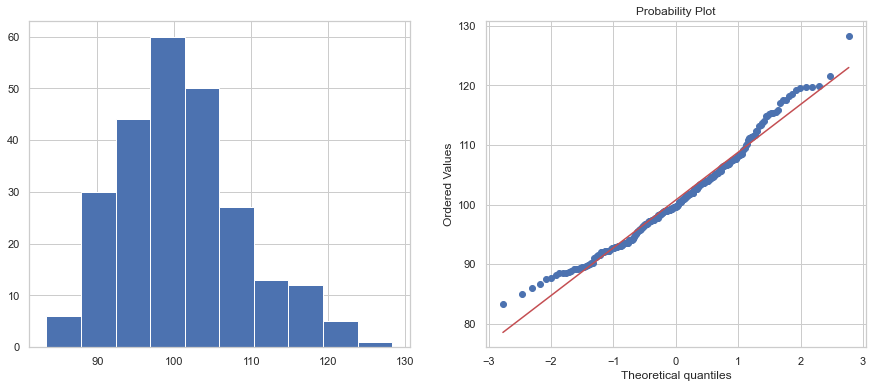

Abdomen


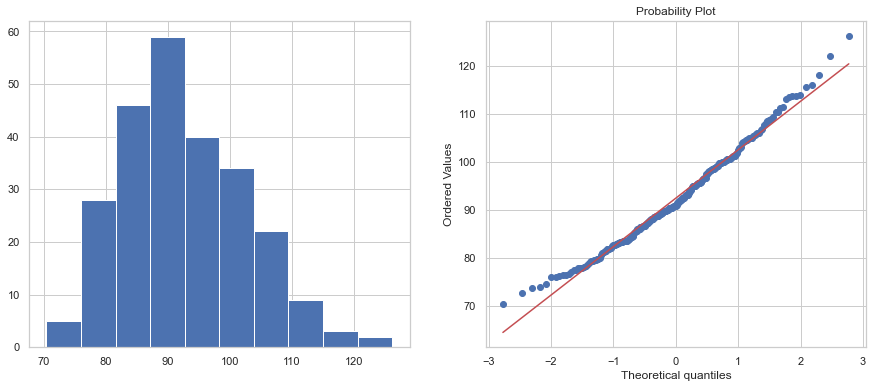

Hip


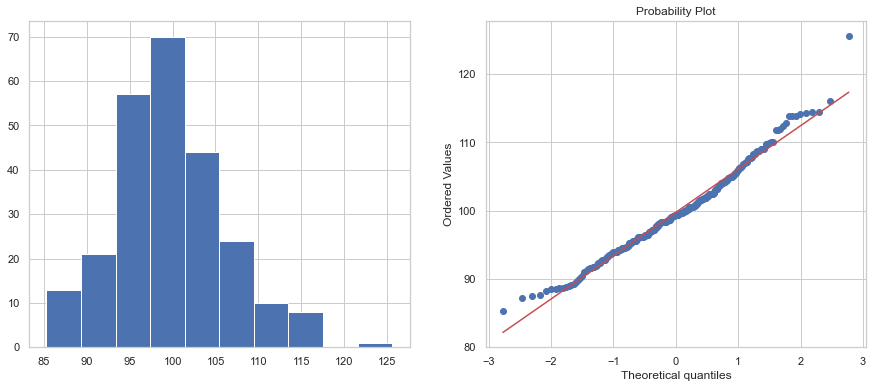

Thigh


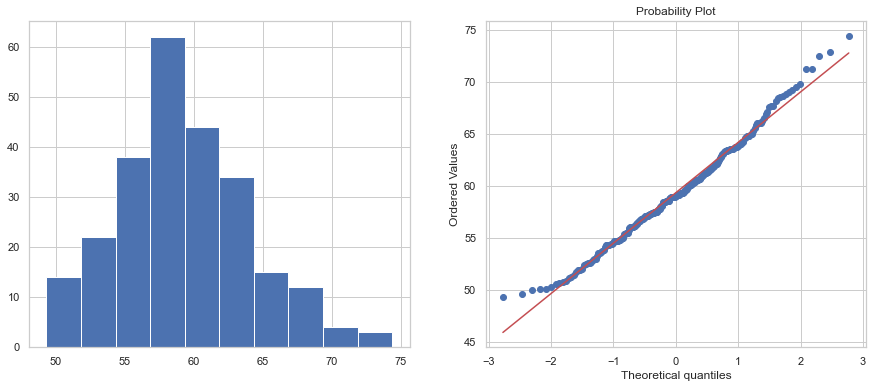

Knee


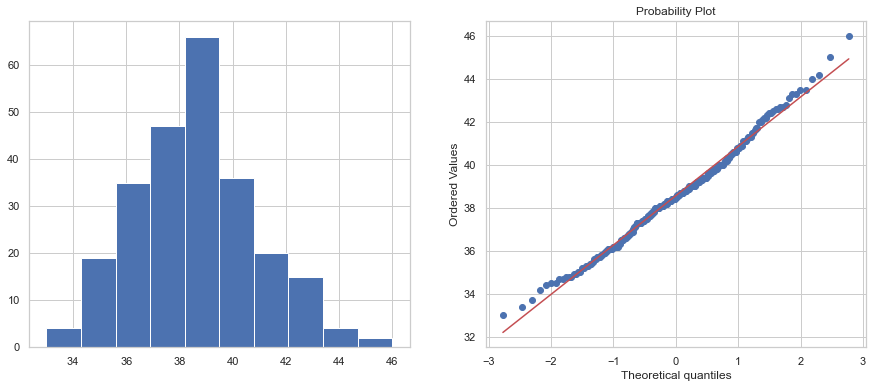

Ankle


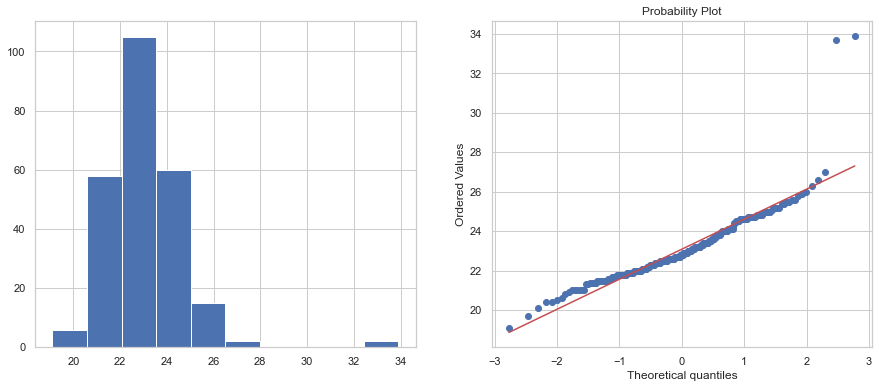

Biceps


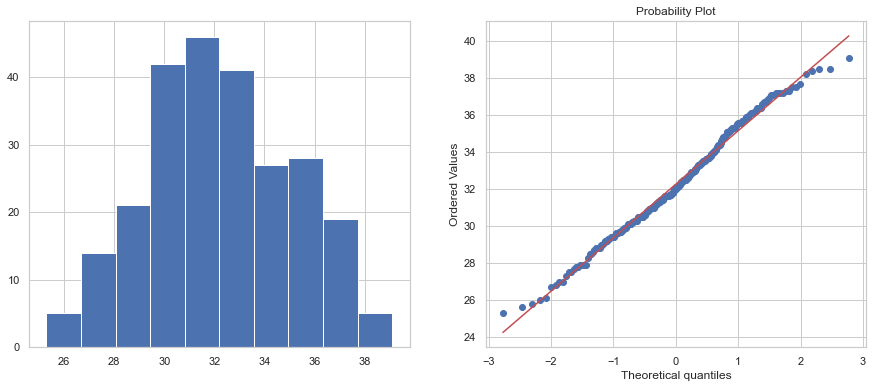

Forearm


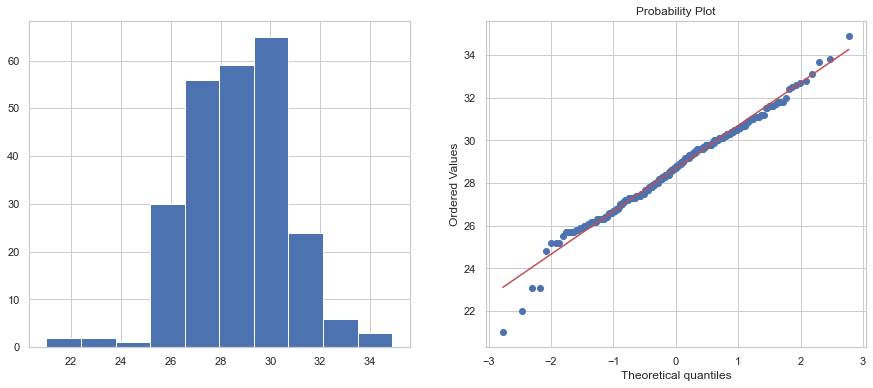

Wrist


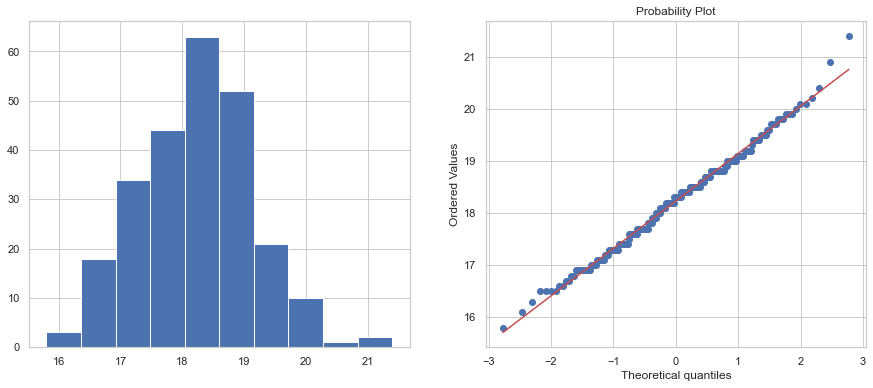

In [23]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [24]:
mwr = df[(df.Weight >= 145) & (df.Weight <= 165)]

In [46]:
import plotly.express as px
fig = px.scatter_3d(mwr, x='BodyFat', y='Height', z='Age',
                    color='Weight')
fig.show()

In [47]:
df

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  
1     58.7  37.3   23.4    30.5     28.9   18.2  
2     59.6  38.9   24.0    28.8     25.2   16.6  
3     60.1  37.3   22.8    32.4     29.4   18.2  
4     63.2  42.2   24.0    32.2     27.7   17.7  
..     ...   ...    ...     ...      ...    ...  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9  

[248 rows x 15 columns]

In [161]:
def PlotbyWeight(lbs):
  #a = {"Weight": lbs} 
    if (lbs >= 125) & (lbs <= 145):
        q = df[(df.Weight >= 125) & (df.Weight <= 145)]
        txt = "125-145"
    elif (lbs > 145) & (lbs <= 165):
        q = df[(df.Weight > 145) & (df.Weight <= 165)]
        txt = "145-165"
    elif (lbs > 165) & (lbs <= 190):
        q = df[(df.Weight > 165) & (df.Weight <= 190)]
        txt = "165-190"
    elif (lbs > 190) & (lbs <= 210):
        q = df[(df.Weight > 190) & (df.Weight <= 210)]
        txt = "190-210"
    elif (lbs > 210) & (lbs <= 230):
        q = df[(df.Weight > 210) & (df.Weight <= 230)]
        txt = "210-230"
    elif (lbs > 230) & (lbs <= 250):
        q = df[(df.Weight > 230) & (df.Weight <= 250)]
        txt = "230-250"
    elif (lbs > 250) & (lbs <= 270):
        q = df[(df.Weight > 250) & (df.Weight <= 270)] 
        txt = "250-270"
    figure = ff.create_scatterplotmatrix(
        q[['Height', 'Weight', 'BodyFat', 'Age']],
        height=1000,
        width=1000,
        title=f'Relationship between Height, BodyFat, Age and Weight in the {txt}lb weight range',
        colormap='Blues',
        text=q['Height'],
        diag='histogram',
        index='Weight')
    return iplot(figure)
PlotbyWeight(Weight) 


In [66]:
figure = ff.create_scatterplotmatrix(
    mwr[['Height', 'Weight', 'BodyFat', 'Age']],
    height=1000,
    width=1000,
    title='Relationship between Height, BodyFat, Age and Weight in the 145-165lb weight range',
    colormap='Blues',
    text=mwr['Height'],
    diag='histogram',
    index='Weight')
iplot(figure)

In [67]:
df = df.drop(columns='Density')

In [68]:
df_features = df.drop(columns="BodyFat")

In [69]:
df_features_new = pd.concat(
    [
        df_features.drop(columns=['Abdomen', 'Age']).div(df_features['Abdomen'], axis=0),
        df_features[['Age', 'Abdomen']]
        ], axis=1)

        # Feature engineering to get a better linear relationship between y_pred and y_test 
        # for more accurate predictions by dividing measurements by the abdominal area which is where most men store body fat

In [71]:
X = df_features_new
Y = df["BodyFat"]

In [72]:
import catboost
import time
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

begin = time.time()

X_train, X_val, y_train, y_val = train_test_split(X, Y)

parameters = {
    "depth": [6, 7, 8, 9, 10],
    "learning_rate": [0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.18, 0.19, 0.2, 0.21, 0.22],
    "iterations": [500, 1000], 
}

def train_catboost(hyperparameters, X_train, X_val, y_train, y_val):
    keys = hyperparameters.keys() #keys of each hyperparam
    best_index = {key:0 for key in keys} 
    best_cat = None
    best_score = 10e8
    
    
    for (index, key) in enumerate(keys):
        print("Find best %s" %(key))
        items = hyperparameters[key]
        best_parameter = None
        temp_best = 10e8
        
        
        for (key_index, item) in enumerate(items):
            iterations = hyperparameters["iterations"][best_index["iterations"]] if key != "iterations" else item
            learning_rate = hyperparameters["learning_rate"][best_index["learning_rate"]] if key != "learning_rate" else item
            depth = hyperparameters["depth"][best_index["depth"]] if key != "depth" else item
            print("Train with iterations: %d learning_rate: %.2f depth:%d"%(iterations, learning_rate, depth))
            
            cat = catboost.CatBoostRegressor(
                iterations = iterations, 
                learning_rate = learning_rate,
                depth = depth
            )
           
           
            if best_cat == None:
                best_cat = cat
            cat.fit(X_train, y_train, verbose=False)
            y_pred = cat.predict(X_val)
            score = mean_absolute_error(np.square(y_val), np.square(y_pred))
            print("MAE: %.2f"%(score))
            
            
            if score < temp_best:
                temp_best = score
                best_index[key] = key_index
                best_parameter = item
            
            
            if score < best_score:
                best_score = score
                best_cat = cat
        print("Best %s: "%(key), best_parameter)
    
    
    best_parameters = {
        "iterations": hyperparameters["iterations"][best_index["iterations"]],
        "learning_rate": hyperparameters["learning_rate"][best_index["learning_rate"]],
        "depth": hyperparameters["depth"][best_index["depth"]]
    }

    return best_cat, best_score, best_parameters



best_cat, best_score, best_parameters = train_catboost(parameters, X_train, X_val, y_train, y_val)



print("Best CatBoost Model: ", best_cat)
print("Best MAE: ", best_score)
elapsed = time.time() - begin 
print("Elapsed time: ", elapsed)

Find best depth
Train with iterations: 500 learning_rate: 0.07 depth:6
MAE: 148.76
Train with iterations: 500 learning_rate: 0.07 depth:7
MAE: 143.08
Train with iterations: 500 learning_rate: 0.07 depth:8
MAE: 152.82
Train with iterations: 500 learning_rate: 0.07 depth:9
MAE: 149.99
Train with iterations: 500 learning_rate: 0.07 depth:10
MAE: 162.30
Best depth:  7
Find best learning_rate
Train with iterations: 500 learning_rate: 0.07 depth:7
MAE: 143.08
Train with iterations: 500 learning_rate: 0.08 depth:7
MAE: 148.58
Train with iterations: 500 learning_rate: 0.09 depth:7
MAE: 145.85
Train with iterations: 500 learning_rate: 0.10 depth:7
MAE: 153.39
Train with iterations: 500 learning_rate: 0.11 depth:7
MAE: 152.93
Train with iterations: 500 learning_rate: 0.12 depth:7
MAE: 144.80
Train with iterations: 500 learning_rate: 0.18 depth:7
MAE: 134.67
Train with iterations: 500 learning_rate: 0.19 depth:7
MAE: 147.52
Train with iterations: 500 learning_rate: 0.20 depth:7
MAE: 135.98
Train 

In [101]:
cat = catboost.CatBoostRegressor(
                iterations = 600, 
                learning_rate = .18001,
                depth = 7
            )

cat.fit(X_train, y_train, verbose=False)
y_pred = cat.predict(X_val)
score = mean_absolute_error(np.square(y_val), np.square(y_pred))
print("MAE: %.2f"%(score))

MAE: 134.46


C:\Users\water\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='BodyFat', ylabel='Density'>

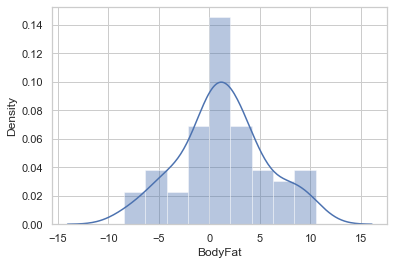

In [103]:
sns.distplot(y_val-y_pred)

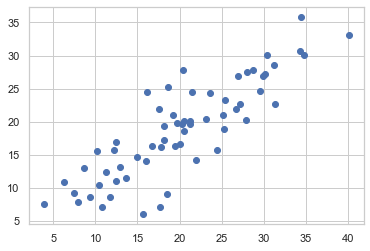

In [102]:
plt.scatter(y_val,y_pred)

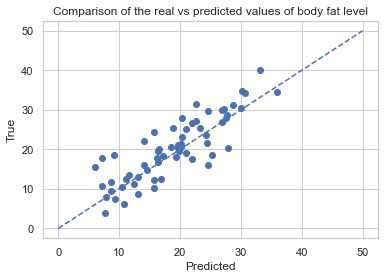

In [105]:
plt.scatter(y_pred, y_val)
plt.plot([0, 50], [0, 50], ls='--')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Comparison of the real vs predicted values of body fat level');

In [124]:
final_model = catboost.CatBoostRegressor(
                iterations = 600, 
                learning_rate = .18001,
                depth = 7
            )

final_model.fit(X,Y, verbose=False)

In [125]:

joblib.dump(final_model, "cat.pkl")

['cat.pkl']